# 一、用Pandas读入数据

In [1]:
import pandas as pd

In [2]:
# read CSV file directly from a URL and save the results
data = pd.read_csv('Advertising.csv', index_col=0)

In [3]:
# display the first 5 rows
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
# display the last 5 rows
data.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [5]:
# check the shape of the DataFrame (rows, columns)
data.shape

(200, 4)

共有200个观测到的样例（每行一个样例），每个样例是一个市场。

每个市场由三个特征描述：

TV：花在电视广告上的费用

radio：花在广播广告上的费用

newspaper：花在报纸广告上的费用

每个市场待预测的值是：

sales：商品的销售量

因为销售量是一个连续值，所以此预测问题是一个回归问题。

# 二、用seaborn可视化数据

In [6]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

d:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


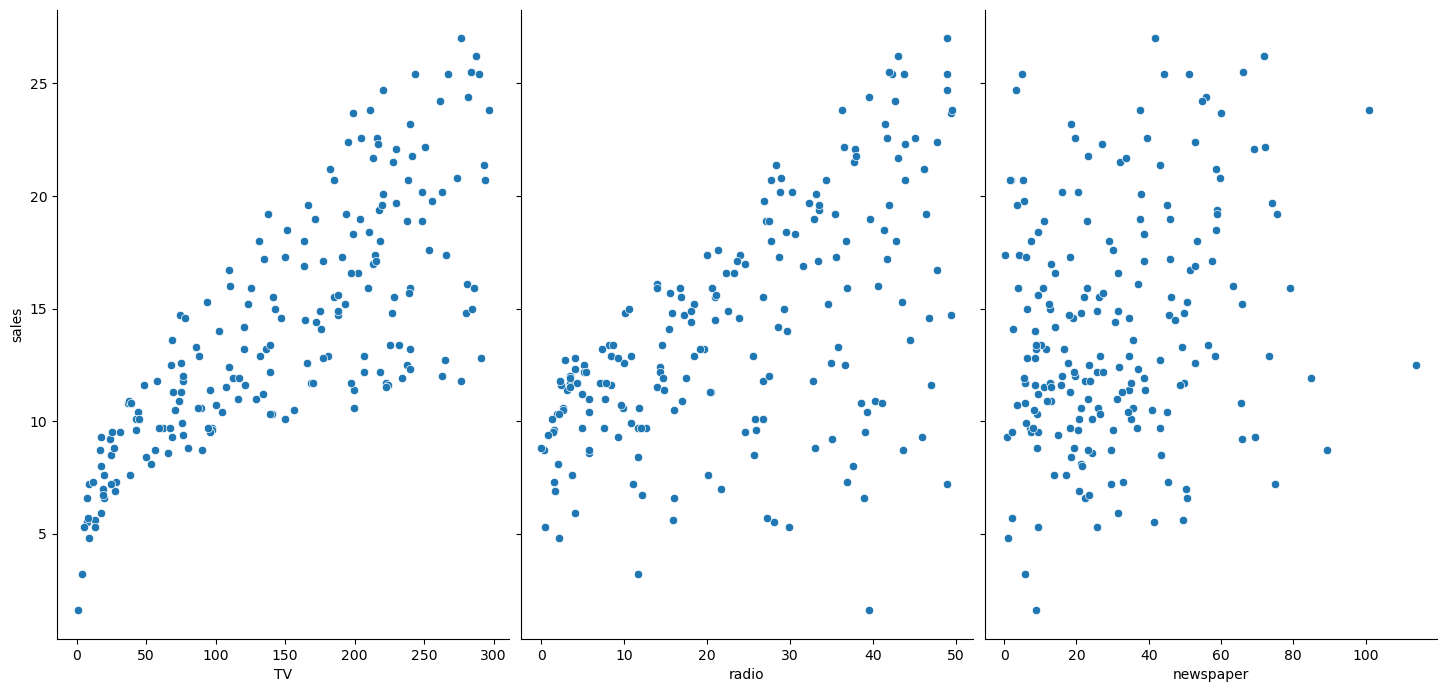

In [8]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', height=7, aspect=0.7)

# 三、线性回归

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

## 用Pandas准备X和y

In [9]:
# create a Python list of feature names
feature_cols = ['TV', 'radio', 'newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# equivalent command to do this in one line
X = data[['TV', 'radio', 'newspaper']]

# print the first 5 rows
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [10]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [11]:
# select a Series from the DataFrame
y = data['sales']

# equivalent command that works if there are no spaces in the column name
y = data.sales

# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [12]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


## 将X和y划分成训练集和测试集

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [14]:
X_train.shape, y_train.shape

((150, 3), (150,))

In [15]:
X_test.shape, y_test.shape

((50, 3), (50,))

## 做线性回归

In [16]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression()

## 解释模型的系数

In [17]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.892570051151152
[0.04416235 0.19900368 0.00116268]


In [18]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('TV', 0.0441623466114929),
 ('radio', 0.19900368040394034),
 ('newspaper', 0.001162678287915886)]

$y = 2.89 + 0.044 \times TV + 0.199 \times Radio + 0.001 \times Newspaper$

如何解释TV的系数，即0.044呢？

给定广播广告费用和报纸广告费用，每增加一个单位的电视广告费，会增加0.044个单位的销售量。比如，每增加1000美金的电视广告费用，会多销售44件商品。

如果系数是负数，则表示销售量会随着广告费用的增加而降低。

## 预测并评价

In [19]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

考察回归模型常用的三种评价指标的计算方法：MAE, MSE, RMSE：

In [20]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

In [22]:
# calculate MAE by hand
print((10 + 0 + 20 + 10)/4.)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


In [23]:
# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


In [24]:
# calculate RMSE by hand
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


实际计算各评价指标在测试集上预测的结果：

In [25]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,y_pred))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,y_pred))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,y_pred),3))

Mean absolute error (MAE): 1.3000320919235444
Mean square error (MSE): 4.012497522917096
Root mean square error (RMSE): 2.00312194409554
R-squared value of predictions: 0.858


## 交叉验证

In [26]:
from sklearn.model_selection import cross_val_score
r2_scores = cross_val_score(linreg, X, y, cv=10)
mse_scores = cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')

In [27]:
print(r2_scores)
print(mse_scores)

[0.87302696 0.8581613  0.92968723 0.89013272 0.93146498 0.93138735
 0.7597901  0.91217097 0.83891753 0.92882311]
[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [28]:
print(r2_scores.mean())
print(mse_scores.mean())

0.8853562237979615
-3.059967618118516


## 特征选择
“newspaper”，报纸广告费用，是否应该加入模型，即是否对预测销售量有帮助？

In [29]:
# create a Python list of feature names
feature_cols = ['TV', 'radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.sales

# split into training and testing sets
r2_scores = cross_val_score(linreg, X, y, cv=10)
mse_scores = cross_val_score(linreg, X, y, cv=10,scoring='neg_mean_squared_error')
print(r2_scores.mean())
print(mse_scores.mean())

0.8869670516810129
-3.0139191555404694


去掉“newspaper”特征，RMSE没发生任何变化，因而可以从模型中去掉该特征

## 增加高次特征，分别做线性回归、岭回归和套索回归

In [30]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2)
X_train_poly = pf.fit_transform(X_train)
X_test_poly = pf.fit_transform(X_test)

In [31]:
X_train_poly

array([[1.00000e+00, 1.09800e+02, 1.43000e+01, ..., 2.04490e+02,
        4.53310e+02, 1.00489e+03],
       [1.00000e+00, 2.29500e+02, 3.23000e+01, ..., 1.04329e+03,
        2.39666e+03, 5.50564e+03],
       [1.00000e+00, 2.53800e+02, 2.13000e+01, ..., 4.53690e+02,
        6.39000e+02, 9.00000e+02],
       ...,
       [1.00000e+00, 7.64000e+01, 8.00000e-01, ..., 6.40000e-01,
        1.18400e+01, 2.19040e+02],
       [1.00000e+00, 2.39900e+02, 4.15000e+01, ..., 1.72225e+03,
        7.67750e+02, 3.42250e+02],
       [1.00000e+00, 1.96000e+01, 2.01000e+01, ..., 4.04010e+02,
        3.41700e+02, 2.89000e+02]])

In [32]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)
y_pred = lr.predict(X_test_poly)
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Root mean square error (RMSE): 0.8887851378874699


In [33]:
from sklearn.linear_model import Ridge, Lasso

# The ridge regression model
rr = Ridge(alpha=0.001)
rr.fit(X_train_poly, y_train)
y_pred_rr = rr.predict(X_test_poly)
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,y_pred_rr)))

# The lasso regression model
lassor = Lasso(alpha=0.0001)
lassor.fit(X_train_poly, y_train)
y_pred_lr = lassor.predict(X_test_poly)
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,y_pred_lr)))

Root mean square error (RMSE): 0.8887851373922335
Root mean square error (RMSE): 0.8887886111316815


## 分别使用RidgeCV, LassoCV和ElasticNetCV在某个范围内自动寻找最佳正则化参数

In [34]:
from sklearn.linear_model import RidgeCV

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, cv=10).fit(X_train, y_train)

y_pred = ridgeCV.predict(X_test)

print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print(ridgeCV.alpha_)

Root mean square error (RMSE): 2.0031218151787105
0.005


In [36]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

lassoCV = LassoCV(alphas=alphas2, max_iter=50000, cv=10).fit(X_train, y_train)

y_pred = lassoCV.predict(X_test)

print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print(lassoCV.alpha_)

Root mean square error (RMSE): 2.003109908150349
0.0005


**ElasticNet add an alpha to determine the weights of L1regulation and L2regulation**
<br>when _alpha => 0_, the model is more to _Lasso(L1)_
<br>when _alpha => infinity_, the model is more to _Ridge(L2)_
<br>so we can regard alpha as a indicator of the role of Ridge in the model

In [37]:
from sklearn.linear_model import ElasticNetCV

l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas=alphas2, l1_ratio=l1_ratios, max_iter=10000, cv=10).fit(X_train, y_train)

y_pred = elasticNetCV.predict(X_test)

print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_)

Root mean square error (RMSE): 2.0031109325536858
0.0005 0.9
